### Objective:
To classify images in the Caltech-256 dataset, which is an improvement over Caltech-101 dataset using a Convolutional Neural Network.

### Problem Statement
To build and implement a Convolutional Neural Network model to classify images in the Caltech-256 dataset.

At the end of this competition, you will be able to:

* Load and extract features of images available in the Caltech-256 dataset using ImageDataGenerator

* Build convolutional neural networks using either Keras or PyTorch deep learning libraries

* Use the pre-trained models using either Keras or PyTorch deep learning libraries

### Description:
Caltech-256 is an object recognition dataset containing approximately 30,000 real-world images, of different sizes, spanning 256 classes (256 object classes and an additional clutter class). Each class is represented by at least 80 images. The dataset is a superset of the Caltech-101 dataset.

Here is a handy link to Kaggle's competition documentation (https://www.kaggle.com/docs/competitions), which includes, among other things, instructions on submitting predictions (https://www.kaggle.com/docs/competitions#making-a-submission).

### Instructions for downloading train and test data are as follows:

### 1. Create an API key in Kaggle.

To do this, go to the competition site on Kaggle at (https://www.kaggle.com/t/43ea7e2607fd4bfba209279bbe072dbd) and open your user settings page. Click Account.

* Click on your profile picture at the top-right corner of the page.

![alt text](https://i.imgur.com/kSLmEj2.png)

* In the popout menu, click the Settings option.

![alt text](https://i.imgur.com/tNi6yun.png)








### 2. Next, scroll down to the API access section and click generate to download an API key (kaggle.json).
![alt text](https://i.imgur.com/vRNBgrF.png)


### 3. Upload your kaggle.json file using the following snippet in a code cell:



In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"radhaac","key":"66704ca9ab5c739ec3d94bb6327f302c"}'}

In [ ]:
#If successfully uploaded in the above step, the 'ls' command here should display the kaggle.json file.
%ls

kaggle.json  sample_data/


### 4. Install the Kaggle API using the following command


In [ ]:
!pip install -U -q kaggle==1.5.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 5.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentry-sdk 2.20.0 requires urllib3>=1.26.11, but you have urllib3 1.24.3 which is incompatible.


### 5. Move the kaggle.json file into ~/.kaggle, which is where the API client expects your token to be located:



In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#Execute the following command to verify whether the kaggle.json is stored in the appropriate location: ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json #run this command to ensure your Kaggle API token is secure on colab

### 6. Now download the Test Data from Kaggle

**NOTE: If you get a '403 - Not Found' error after running the cell below, it is most likely that the user (whose kaggle.json is uploaded above) has not 'accepted' the rules of the competition and therefore has 'not joined' the competition.**

If you encounter **401-unauthorised** download latest **kaggle.json** by repeating steps 1 & 2

In [ ]:
#If you get a forbidden link, you have most likely not joined the competition.
!kaggle competitions download -c to-classify-images-given-in-caltech-256-dataset

 99% 313M/316M [00:08<00:00, 42.1MB/s]
100% 316M/316M [00:08<00:00, 38.9MB/s]


In [ ]:
!unzip to-classify-images-given-in-caltech-256-dataset

Streaming output truncated to the last 5000 lines.
  inflating: test/4759.jpg           
  inflating: test/476.jpg            
  inflating: test/4760.jpg           
  inflating: test/4761.jpg           
  inflating: test/4762.jpg           
  inflating: test/4763.jpg           
  inflating: test/4764.jpg           
  inflating: test/4765.jpg           
  inflating: test/4766.jpg           
  inflating: test/4767.jpg           
  inflating: test/4768.jpg           
  inflating: test/4769.jpg           
  inflating: test/477.jpg            
  inflating: test/4770.jpg           
  inflating: test/4771.jpg           
  inflating: test/4772.jpg           
  inflating: test/4773.jpg           
  inflating: test/4774.jpg           
  inflating: test/4775.jpg           
  inflating: test/4776.jpg           
  inflating: test/4777.jpg           
  inflating: test/4778.jpg           
  inflating: test/4779.jpg           
  inflating: test/478.jpg            
  inflating: test/4780.jpg           

### 7. Download the Train Data

In [ ]:
%%capture
!wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Caltech_256_Train.zip

!unzip "Caltech_256_Train.zip"

## Grading = 10 Marks

## YOUR CODING STARTS FROM HERE

### Import Required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import IPython.display as ipd
import os
from pathlib import Path

import tensorflow as tf
# Enable eager execution to avoid tf.function behavior
tf.config.run_functions_eagerly(True)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, ReLU, BatchNormalization, Dropout, Input, Conv2D, MaxPooling2D,Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

### **Stage 1:** Data Loading and preprocessing of Images (3 points)

#### Analyze the shape of images and distribution of classes

In [ ]:
# Create a dataframe with the images file path and labels

data_dir='./Caltech_256_Train'
filepath=[]
labels=[]
folds=os.listdir(data_dir)
for fold in folds:
    file_path=os.path.join(data_dir,fold)
    if not os.path.isdir(file_path): # if not a directory, skip
        continue
    fpath = os.listdir(file_path)

    for f in fpath:
        fil_path=os.path.join(file_path,f)
        filepath.append(fil_path)
        labels.append(fold)

image_df=pd.DataFrame({'filepath': filepath,    'labels': labels})
image_df = image_df.sample(frac=1, random_state=1)

In [ ]:
image_df.head()

,filepath,labels
10299,./Caltech_256_Train/Ewer-101/066_0001.jpg,Ewer-101
6892,./Caltech_256_Train/Backpack/003_0122.jpg,Backpack
7777,./Caltech_256_Train/Airplanes-101/251_0624.jpg,Airplanes-101
11923,./Caltech_256_Train/Frying-Pan/081_0027.jpg,Frying-Pan
6544,./Caltech_256_Train/Clutter/257_0047.jpg,Clutter


In [ ]:
# Check the number of labels in the image dataset (the number of objects)
image_df['labels'].nunique()

256

In [ ]:
# Check the names of labels in the image dataset (name of objects)
image_df['labels'].unique()

array(['Helicopter-101', 'Snowmobile', 'Palm-Pilot', 'Ladder',
       'Cormorant', 'Bonsai-101', 'Desk-Globe', 'Doorknob', 'Mattress',
       'Video-Projector', 'Cowboy-Hat', 'Iris', 'Minaret', 'Canoe',
       'Soccer-Ball', 'Hamburger', 'Chandelier-101', 'Waterfall',
       'Goldfish', 'Frog', 'Knife', 'Llightning', 'Stirrups', 'Teepee',
       'Clutter', 'Airplanes-101', 'Tweezer', 'Watch-101', 'Vcr',
       'Self-Propelled-Lawn-Mower', 'Fire-Hydrant', 'Kayak',
       'Picnic-Table', 'Telephone-Box', 'Tomato', 'Pyramid', 'Sword',
       'Frisbee', 'People', 'Radio-Telescope', 'House-Fly', 'Unicorn',
       'Washing-Machine', 'Laptop-101', 'Billiards', 'Fried-Egg',
       'Teddy-Bear', 'Motorbikes-101', 'Sheet-Music', 'Skateboard',
       'Mussels', 'Wheelbarrow', 'Mountain-Bike', 'Dolphin-101',
       'Megaphone', 'Pez-Dispenser', 'Elk', 'Goat', 'Fire-Truck',
       'Penguin', 'Harpsichord', 'Umbrella-101', 'Faces-Easy-101',
       'Tambourine', 'Steering-Wheel', 'Menorah-101', 'Dumb

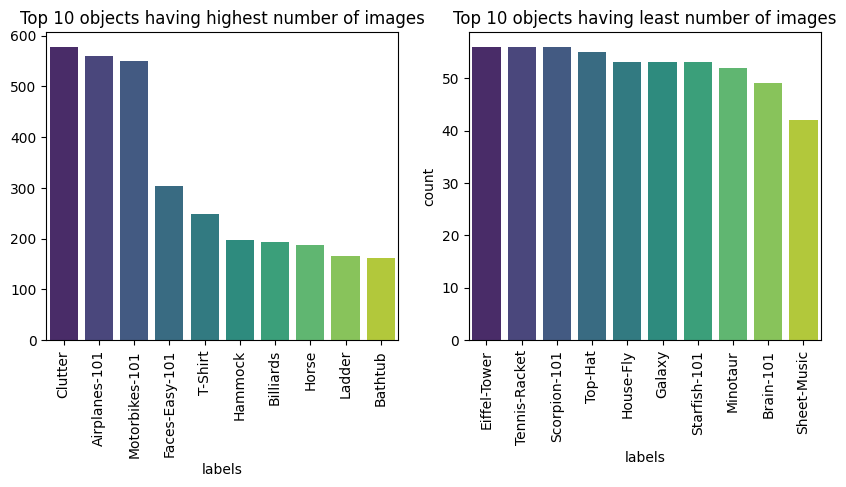

In [ ]:
# Plot the top 10 objects with having highest and least number of images.
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.barplot(x=image_df['labels'].value_counts().sort_values(ascending=False)[:10].index,y=image_df['labels'].value_counts().sort_values(ascending=False)[:10].values,palette='viridis')
plt.title('Top 10 objects having highest number of images')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=image_df['labels'].value_counts().sort_values(ascending=False)[-10:].index,y=image_df['labels'].value_counts().sort_values(ascending=False)[-10:].values,palette='viridis')
plt.title('Top 10 objects having least number of images')
plt.xticks(rotation=90)

plt.xlabel('labels')
plt.ylabel('count')
plt.show()

#### Visualize the sample images of each class


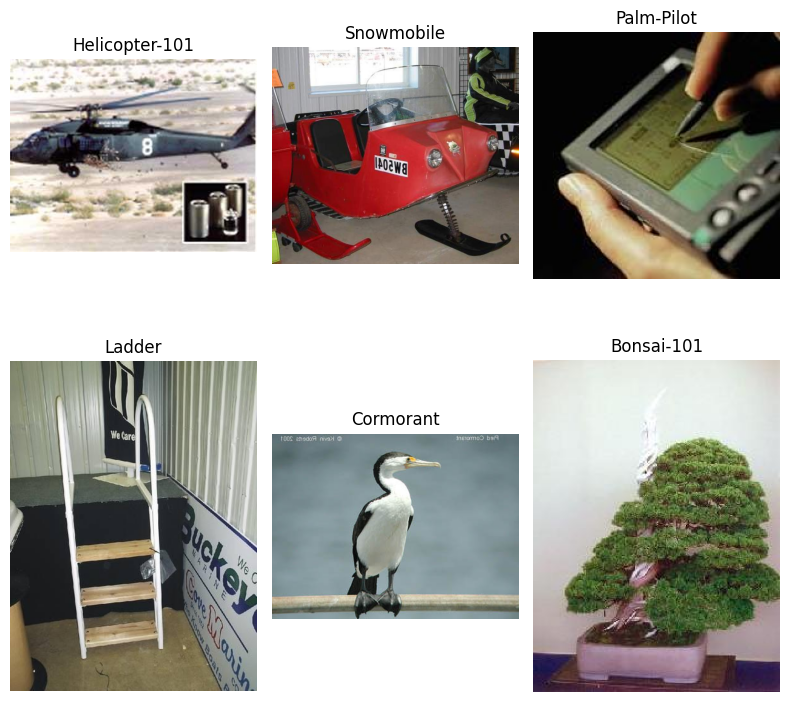

In [ ]:
# Plot the first few images from the image dataset
num_images_to_plot = 6  # Number of images to display
plt.figure(figsize=(8, 8))

for i in range(num_images_to_plot):
    img = mpimg.imread(image_df.iloc[i]['filepath'])   # Read the image data from the file path
    plt.subplot(2, 3, i + 1)  # Create a 3x3 grid of subplots
    plt.imshow(img)     # Display the image
    plt.title(image_df.iloc[i]["labels"])  # Set the title to the corresponding label
    plt.axis('off')           # Hide the axis

plt.tight_layout()
plt.show()

### Data loading

In [ ]:
# Define the data augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

In [ ]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(299, 299),
    batch_size=64,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Load validation data
validation_generator = valid_datagen.flow_from_directory(
    data_dir,
    target_size=(299, 299),
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 16905 images belonging to 256 classes.
Found 4103 images belonging to 256 classes.


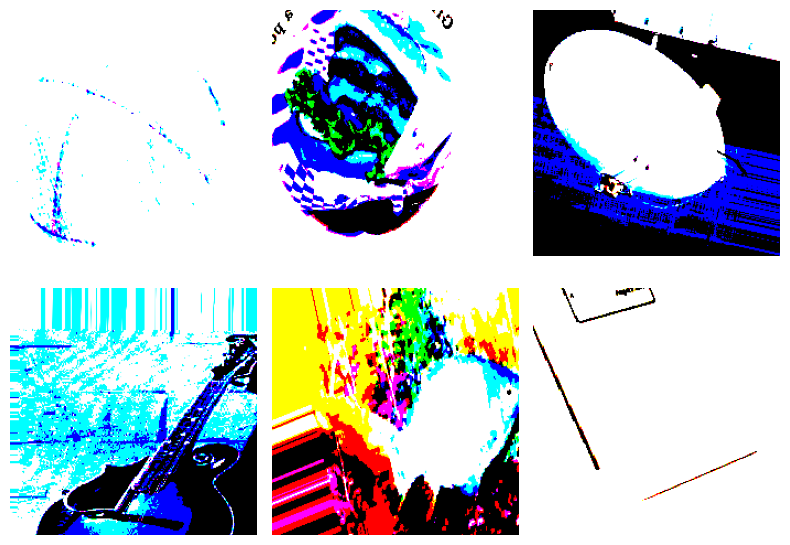

In [ ]:
# Plot sample images from a batch of train_generator
images, labels = next(train_generator)

# Plot the first few images from the batch
num_images_to_plot = 6  # Number of images to display
plt.figure(figsize=(8, 6))

for i in range(num_images_to_plot):
    plt.subplot(2, 3, i + 1)  # Create a 3x3 grid of subplots
    plt.imshow(images[i])     # Display the image
    # plt.title(f'Label: {labels[i]}')  # Set the title to the corresponding label
    plt.axis('off')           # Hide the axis

plt.tight_layout()
plt.show()

### **Stage 2:** Build and train the CNN model using Keras/Pytorch (5 points)

You can train the CNN model and Pre-trained model and then compare the model performance on the kaggle testset


### Transfer learning

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.



#### Use the pre-trained models

* Load the pre-trained model
* Train and evaluate the images

###Train using CNN model

In [ ]:
cnn_model = tf.keras.models.Sequential([
    # Resize the image
    tf.keras.layers.Resizing(150, 150, input_shape=(299, 299, 3)),
    # tf.keras.layers.Rescaling(1./255),
    # Convolution and Pooling layers
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    # Flatten the layers to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='softmax')
])

# # Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 354s 1s/step - accuracy: 0.0618 - loss: 9.8046 - val_accuracy: 0.0292 - val_loss: 6.9894
Epoch 2/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 351s 1s/step - accuracy: 0.0892 - loss: 6.4120 - val_accuracy: 0.0863 - val_loss: 6.4175
Epoch 3/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 350s 1s/step - accuracy: 0.1070 - loss: 6.3132 - val_accuracy: 0.1002 - val_loss: 6.7738
Epoch 4/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 350s 1s/step - accuracy: 0.1124 - loss: 6.4478 - val_accuracy: 0.1228 - val_loss: 6.3013
Epoch 5/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 348s 1s/step - accuracy: 0.1204 - loss: 6.4288 - val_accuracy: 0.1262 - val_loss: 7.1380
Epoch 6/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 349s 1s/step - accuracy: 0.1288 - loss: 6.7225 - val_accuracy: 0.1321 - val_loss: 6.6338
Epoch 7/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 351s 1s/step - accuracy: 0.1353 - loss: 6.7067 - val_accuracy: 0.1418 - val_loss: 6.8493
Epoch 8/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 349s 1s/step - accuracy: 0.1522 - loss: 6.9058 - val_accu

### Train using pretrained model InceptionV3 model

In [ ]:
# Define image size and shape
img_shape = (299, 299, 3)

# Determine the number of classes from the train generator
class_count = len(list(train_generator.class_indices.keys()))

# Create the base model using ResNet50
base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=img_shape)

# Freeze all layers except the last 20
for layer in base_model.layers[:-20]:
    layer.trainable = False
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Add custom layers on top of the base model
x = GlobalAveragePooling2D()(base_model.output)
predictions = Dense(class_count, activation='softmax')(x)

# Define the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with optimizer and loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 299, 299, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 149, 149, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 149, 149, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 149, 149, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 147, 147, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 147, 147, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 147, 147, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 147, 147, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 147, 147, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 147, 147, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 73, 73, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 73, 73, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 73, 73, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 71, 71, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 71, 71, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 22,327,328 (85.17 MB)

 Trainable params: 2,459,904 (9.38 MB)

 Non-trainable params: 19,867,424 (75.79 MB)

In [ ]:
# Define callbacks for early stopping and model checkpoint
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.85, patience=2, min_lr=1e-7)
]

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 363s 1s/step - accuracy: 0.2430 - loss: 4.4730 - val_accuracy: 0.7324 - val_loss: 1.9683 - learning_rate: 1.0000e-04
Epoch 2/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 354s 1s/step - accuracy: 0.7071 - loss: 1.9609 - val_accuracy: 0.8150 - val_loss: 1.1348 - learning_rate: 1.0000e-04
Epoch 3/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 342s 1s/step - accuracy: 0.7959 - loss: 1.2413 - val_accuracy: 0.8387 - val_loss: 0.8809 - learning_rate: 1.0000e-04
Epoch 4/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - accuracy: 0.8311 - loss: 0.9575 - val_accuracy: 0.8533 - val_loss: 0.7451 - learning_rate: 1.0000e-04
Epoch 5/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - accuracy: 0.8507 - loss: 0.8024 - val_accuracy: 0.8608 - val_loss: 0.6718 - learning_rate: 1.0000e-04
Epoch 6/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - accuracy: 0.8683 - loss: 0.6839 - val_accuracy: 0.8623 - val_loss: 0.6235 - learning_rate: 1.0000e-04
Epoch 7/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - acc

In [ ]:
val_accuracy = model.evaluate(validation_generator)
print("Validation accuracy: ", val_accuracy)

65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 389ms/step - accuracy: 0.8918 - loss: 0.4401
Validation accuracy:  [0.4621480405330658, 0.8869119882583618]


####Display pretrained model performance

In [ ]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    # index_loss = np.argmin(val_loss)
    # val_lowest = val_loss[index_loss]
    # index_acc = np.argmax(val_acc)
    # acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    # loss_label = f'best epoch= {str(index_loss + 1)}'
    # acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (12, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    # plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    # plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

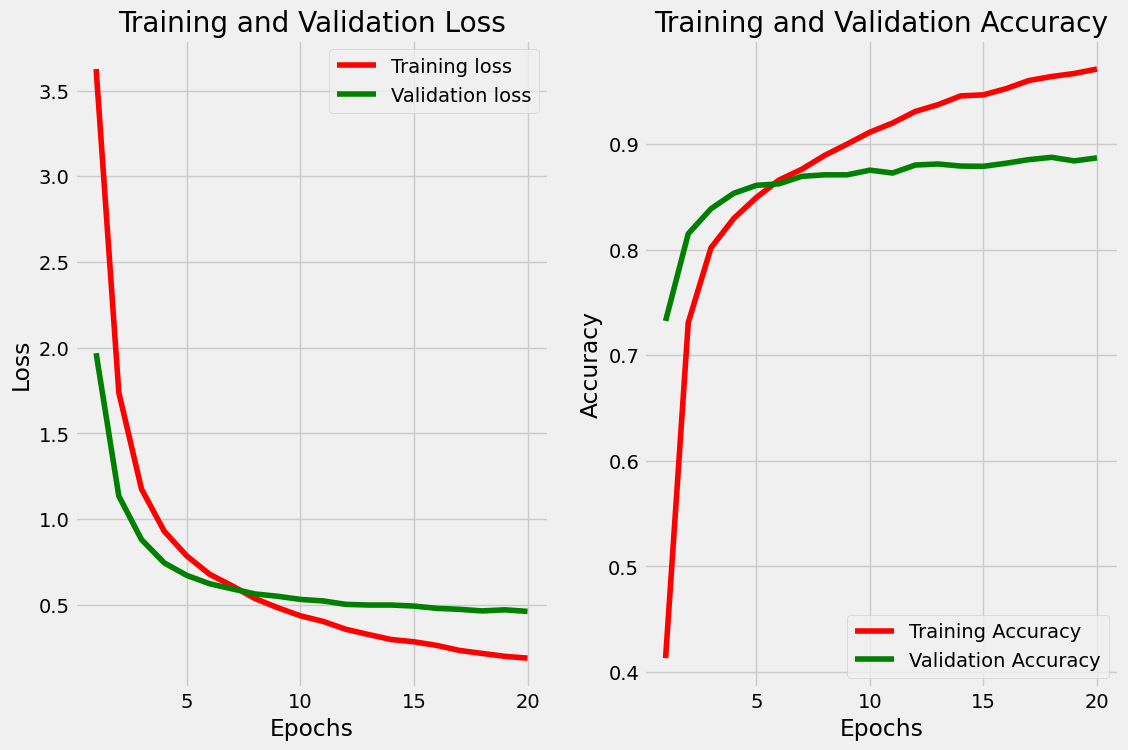

In [ ]:
plot_training(history)

### Pretrained model confusion matrix

65/65 ━━━━━━━━━━━━━━━━━━━━ 24s 366ms/step


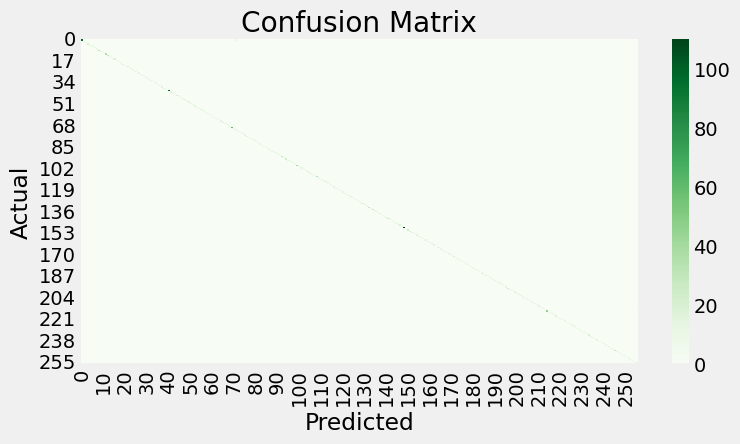

In [ ]:
# Get predictions for the test data
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels for the test data
true_classes = validation_generator.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, y_pred_classes)
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

####Display CNN and Pretrained model performance

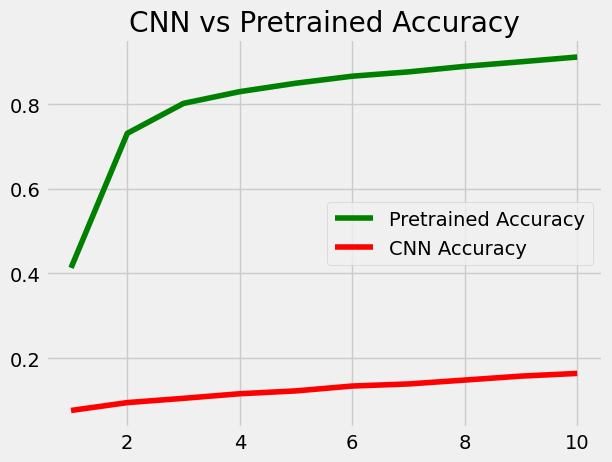

In [ ]:
epch = [i+1 for i in range(10)]
pretrained_acc = history.history['accuracy'][:10]
cnn_acc = cnn_history.history['accuracy']
plt.plot(epch, pretrained_acc, 'g', label= 'Pretrained Accuracy')
plt.plot(epch, cnn_acc, 'r', label= 'CNN Accuracy')
plt.title('CNN vs Pretrained Accuracy')
plt.legend()
plt.show()

###   **Stage 3**: Evaluate the Model and get model predictions on the Kaggle testset (2 Points)









In [ ]:
test_data_dir = './test'  # Path to your test folder

# Define ImageDataGenerator with ResNet50 preprocessing
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Get a list of all image file paths in the test folder
image_paths = [os.path.join(test_data_dir, f) for f in os.listdir(test_data_dir) if os.path.isfile(os.path.join(test_data_dir, f))]

BATCH_SIZE = 64
predictions = []
image_names = []  # Store image file names

# Process images in batches
batch_images = []
batch_image_paths = []

for idx, image_path in enumerate(image_paths):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(299, 299))
    x = img_to_array(img)
    x = preprocess_input(x)  # Normalize for ResNet50
    batch_images.append(x)
    batch_image_paths.append(os.path.basename(image_path))  # Store image name

    # Process in batches
    if len(batch_images) == BATCH_SIZE or idx == len(image_paths) - 1:
        batch_images = np.array(batch_images)  # Convert to NumPy array
        preds = model.predict(batch_images, batch_size=BATCH_SIZE)  # Predict batch

        # Convert predictions to labels
        class_labels = {v: k for k, v in train_generator.class_indices.items()}  # Reverse class mapping
        batch_predictions = [class_labels[np.argmax(pred)] for pred in preds]

        # Store results
        predictions.extend(batch_predictions)
        image_names.extend(batch_image_paths)

        # Reset batch lists
        batch_images = []
        batch_image_paths = []

# Create a DataFrame for submission
predictions_df = pd.DataFrame({'img_path': image_names, 'label': predictions})
# predictions_df.to_csv('output1.csv', index=False)  # Save to CSV for Kaggle submission

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
predictions_df['img_path'] = 'test/' + predictions_df['img_path']

In [ ]:
predictions_df.to_csv('output8.csv', index=False)  # Save to CSV for Kaggle submission

In [ ]:
predictions_df.head()

,img_path,label
0,test/5336.jpg,Dog
1,test/3812.jpg,Cd
2,test/2137.jpg,Snail
3,test/2966.jpg,Gorilla
4,test/848.jpg,Diamond-Ring


In [ ]:
# upload predictions to kaggle
!kaggle competitions submit -c to-classify-images-given-in-caltech-256-dataset -f output8.csv -m "v8"

100% 216k/216k [00:01<00:00, 191kB/s]
Successfully submitted to To Classify Images Given in Caltech 256 Dataset

### Report Analysis

- Compare the accuracies for the Pre-trained vs CNN models
- What process was followed to tune the hyperparameters?
- Plot the confusion matrix in terms of the misclassifications